In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset and check : 
data_set  = pd.read_csv('advertising.csv')

In [3]:
data_set.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


##### will be checking the three variables and then make the regression model which will predict the sales data with the three variables : 

In [4]:
# Checking the info for the model : 
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# using descrobe  to check all the numeric columns : 
data_set.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

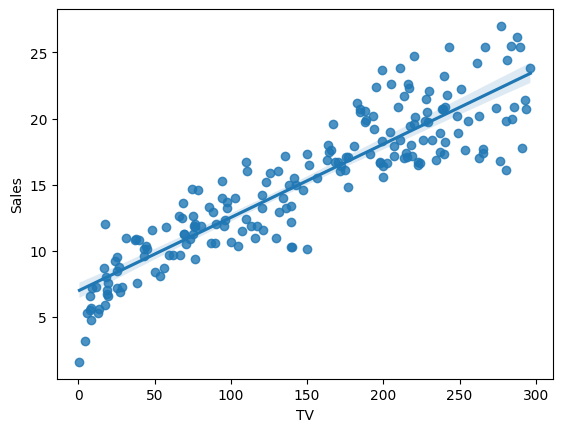

In [6]:
# now visualizing the dataset: check for the linear line using the scatter plot : 

sns.regplot(x = 'TV' , y = "Sales" , data=data_set)

<Axes: xlabel='Radio', ylabel='Sales'>

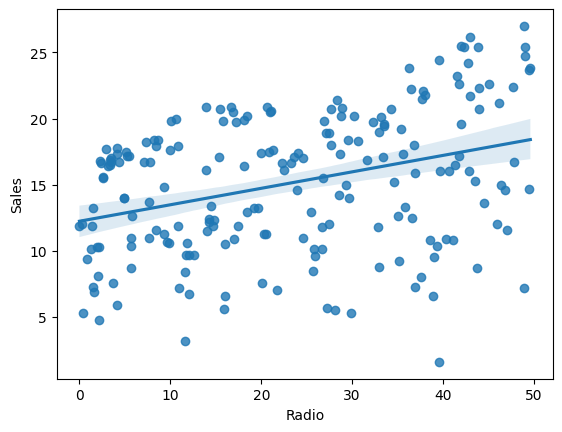

In [7]:
# check for the radio also and for the newspaper also  :
sns.regplot(x = 'Radio' , y = "Sales" , data=data_set)

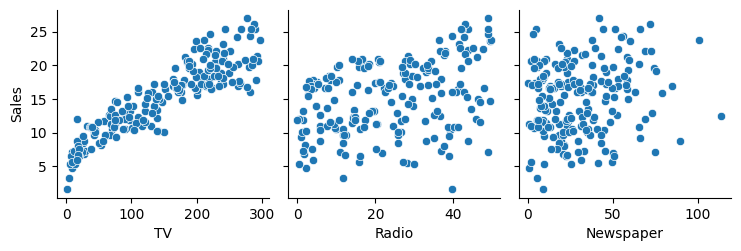

In [8]:
# for making the chart for all variables all together ( for comparison ) : 

sns.pairplot(data=data_set , x_vars=['TV' , 'Radio' , 'Newspaper'] , y_vars='Sales')

In [9]:
# we can also check for the heatmap ) for comparison : for correlation  : 
data_set.corr() # gets the correlation in between the three variables 

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

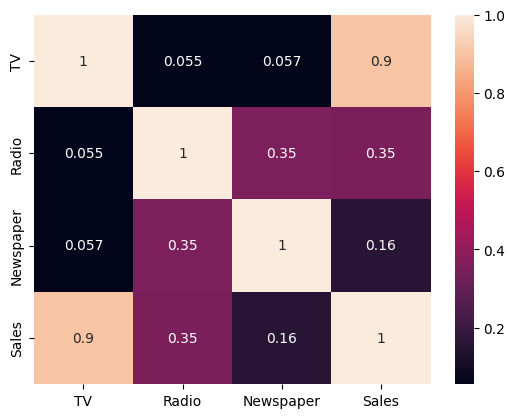

In [10]:
sns.heatmap(data_set.corr() , annot=True)

#### For making the liner regression we have to do the hypothesis testing and make sure that B1 is significatnt and the relationship holds for the liear regtression

In [11]:
# for now we will be chceking the linear regeression between tv and sales : 
# for that we have to import the stats libarary : 
import statsmodels
import statsmodels.api as sm
import sklearn


#### we can use the both stasmodels and skelern to make the linear regression models : we can choose either one : 

### steps for model building : 

1. Create X and Y 
2. Create Train and Test sets ( 70-30 or 80 -20 and then will check the result using the R2(square in this case ))
3. Train the model and learn the coefficients 
4. Evaluate the model and if required fine tune it

In [12]:
data_set.head() 


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [13]:
X  = data_set['TV']
y = data_set['Sales']

In [14]:
# Do Train Test split  : 
# for that we have to import the train test spli t
from sklearn.model_selection import train_test_split

In [15]:
# we wanna have the 75% as traning and reaming as testing 

X_train , X_test , y_train ,y_test  = train_test_split(X , y , train_size=0.70 , random_state=100)


In [16]:
X_train.shape

(140,)

In [17]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [18]:
# Trainning the model  : 
# using the stats models  : 

# by default the statsmodel library doesnot includes the intercept :
''' for that we have to add the constant explicitly which can be done using the X train'''

X_train_sm  = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [19]:
# fitting the model : trainning the model : 
lr_model  = sm.OLS(y_train , X_train_sm) # ordinary least squares is the OLM which we are using here 
lr_model_fit  = lr_model.fit()

In [20]:
lr_model_fit.params

const    6.948683
TV       0.054546
dtype: float64

In [21]:
# This gives the equation as :  
# sales = 6.9486 + 0.05 x TV
lr_model_fit.summary() # only given by the stats model 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           1.52e-52
Time:                        10:15:29   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### P value is used to check the significance of the coefficients 
##### with the constant the significance between the sales and TV in case P value is high the value is not significant 

In [22]:
'''coff and p value 
r2 vaalue 
f statistic if it low means the fit is not by chance  '''



'coff and p value \nr2 vaalue \nf statistic if it low means the fit is not by chance  '

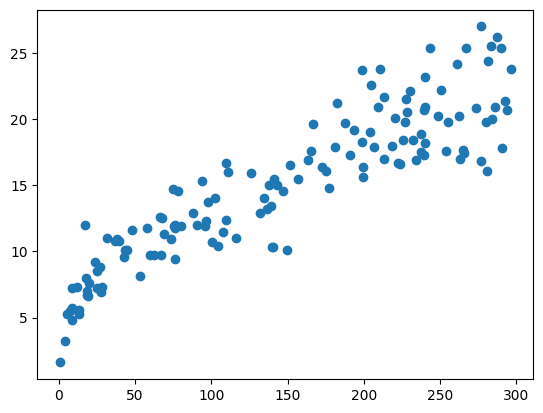

In [23]:
# to check the model we can make the model xTrain y train and test for both x and y
plt.scatter(X_train , y_train)

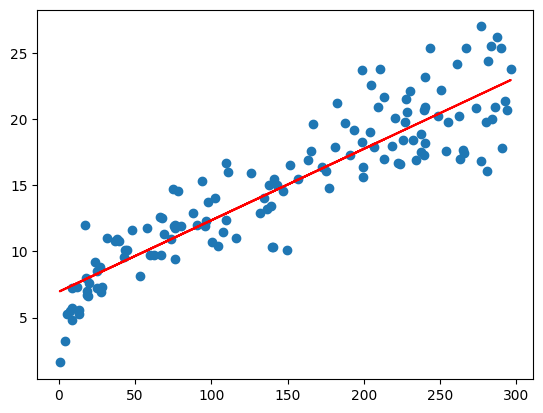

In [24]:
plt.scatter(X_train , y_train)
plt.plot(X_train , 6.948 + 0.054*X_train , 'r')
plt.show()

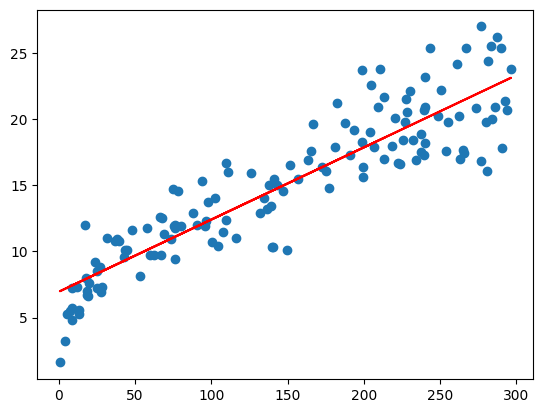

In [25]:
# check the data using the y_train Pred also  \plt.scatter(X_train , y_train)
plt.scatter(X_train , y_train)
y_train_pred = lr_model_fit.predict(X_train_sm)
plt.plot(X_train ,y_train_pred, 'r')
plt.show()

#### Steps in linear regression  : 
##### Reading and Understanding the data 
##### Trainning the Model 
##### Residual Analysis

## Residual analysis : Checking the error terms , error  = f  ( y_train , Y-train_poredicted from model ) assumption is that they are linearlyu distributed 
### for that we need to get the y train predicted we can make the model to so

Text(0.5, 1.0, 'Residual Plot')

<Figure size 640x480 with 0 Axes>

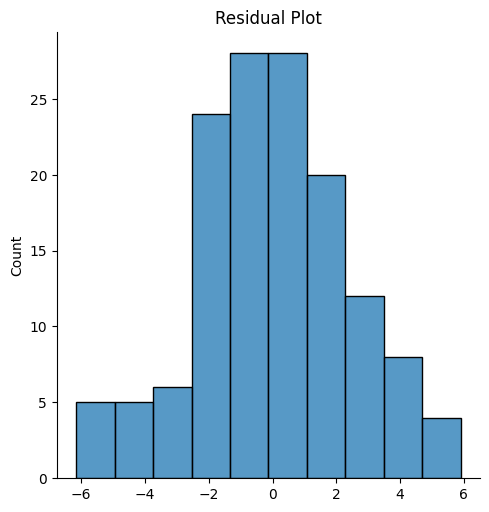

In [26]:
res  = y_train - y_train_pred
# Plotting the residuals : 
plt.figure()
sns.displot(res)
plt.title("Residual Plot")

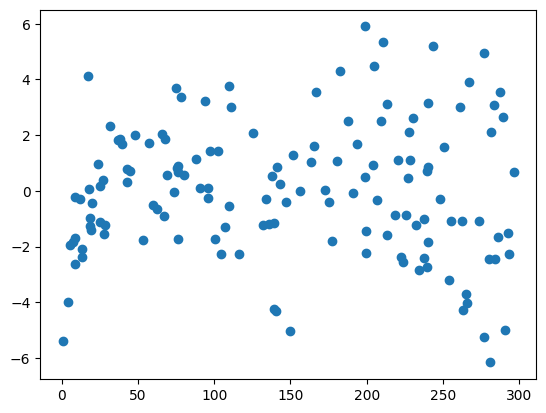

In [27]:
# look for patters and is there are pattrerns means the model is failing there should not be any visible patterns in residuals : 
plt.scatter(X_train ,  res)
plt.show()

In [28]:
# data popints in the liner regression case should be hugging the parts and gettin the data in the residuals should be evenly distributed

### Step 4 Making predections in the test set and checking the efficiency of the model  : 


In [29]:
# checking the model  : doing the predections on the test set  : 
# evaluate the model using the rsquared as the metric

# add a const / intercept to the test 
X_test_sm  = sm.add_constant(X_test)

y_test_pred = lr_model_fit.predict(X_test_sm)
y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [30]:
# evaluate the model r squared on the test 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score # this is the rsquared 

In [31]:
r2 = r2_score(y_true=y_test , y_pred=y_test_pred)
r2

0.792103160124566

In [32]:
# r2 on train set and get the r squared value : 
r2_score(y_true=y_train , y_pred=y_train_pred)

0.8157933136480389

#### The difference shows the diff in between the test and pred and the train and train pred and the diff in less than 5% anything less than 5% is good model building 
##### This shows stability means the model is able to predict the value with good accurary 

In [33]:
# we can do the mean sqaured error and can be used to compare the different models  : 
mean_squared_error(y_true = y_test , y_pred=y_test_pred)

4.077556371826953

In [34]:
# we can do the visualization on the X_test and y_test using the scatter plot also 

## Linear regression using sklearn  : 


#### we will be using the same train and test split and will be using the same random part for splitting the data 

## setps in sklearn model building 

create an object for linear regresion  
fit the model  
seee the parms make predections ( train test )
evaluate the model

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
# splitting the data ame step as above : 
X_train , X_test  , y_train,  y_test  = train_test_split(X , y , train_size=0.70 , random_state=100)

In [40]:
X_train.shape
# as the shape is 1 d array and we need to have a 2d array for this : 
X_train_lm  = X_train.values.reshape(-1 , 1)
X_test_lm  = X_test.values.reshape(-1 , 1)

In [42]:
## doing the train est split and check the same

lm  = LinearRegression() # make the instance of the linear regerssion model  
lm.fit(X_train_lm , y_train)



LinearRegression()

In [43]:
# see the params and make predections : 
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [44]:
# now we have seen the coefficient and the intercept make the predections  : 

Y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [46]:
#evaluate the model : 

print(r2_score(y_true=y_train , y_pred=y_train_pred))
print(r2_score(y_true=y_test , y_pred=y_test_pred))

0.8157933136480389
0.7921031601245662
